In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
#read the dataset
df = pd.read_csv('properties3.csv')

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], format='%b-%y')

#convert district to factor
df['district'] = df['district'].astype('category')

#add a new column using the first string split by space converted to integer from the level column
df['level_lower'] = df['level'].str.split(' ').str[0].astype(int)

#add a per square foot column
df['psf'] = df['price'] / df['area']

#summarize the dataset
print(df.describe())

           commence         price           area  \
count  88591.000000  1.245120e+05  124512.000000   
mean    2006.187299  1.813386e+06    1141.254965   
min     1826.000000  3.400000e+05     258.000000   
25%     2007.000000  1.020000e+06     678.130000   
50%     2014.000000  1.355000e+06     958.000000   
75%     2018.000000  1.825000e+06    1259.000000   
max     2022.000000  9.800000e+08  947081.000000   
std       27.279866  9.228827e+06    5922.408835   

                                date    level_lower            psf  
count                         124512  124512.000000  124512.000000  
mean   2020-01-17 17:05:10.177332480       8.291932    1598.698632  
min              2017-01-01 00:00:00      -5.000000     279.605263  
25%              2018-06-01 00:00:00       1.000000    1217.653266  
50%              2020-05-01 00:00:00       6.000000    1517.817179  
75%              2021-08-01 00:00:00      11.000000    1846.424385  
max              2022-12-01 00:00:00      71.000

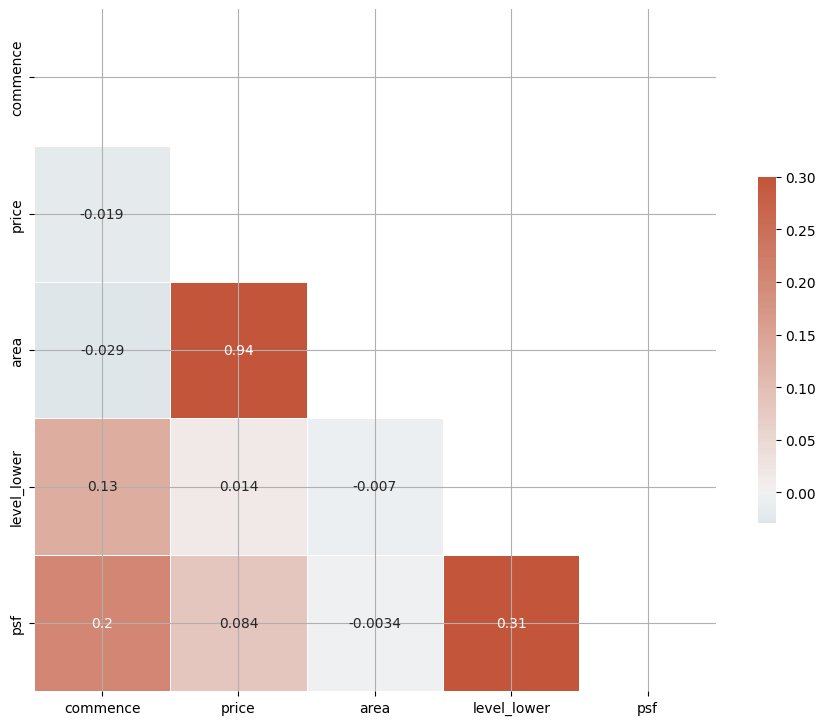

In [42]:
#select only the columns that are numeric
df_numeric = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr = df_numeric.corr()

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Add gridlines
ax.grid(True)

plt.show()


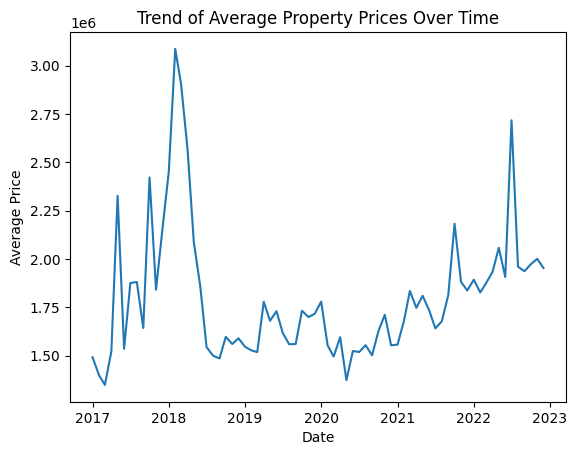

In [43]:
# Sort DataFrame by date
df = df.sort_values('date')

# Calculate average price for each date
average_price = df.groupby('date')['price'].mean()

# Plot average price against date
plt.plot(average_price.index, average_price.values)

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Trend of Average Property Prices Over Time')
plt.show()


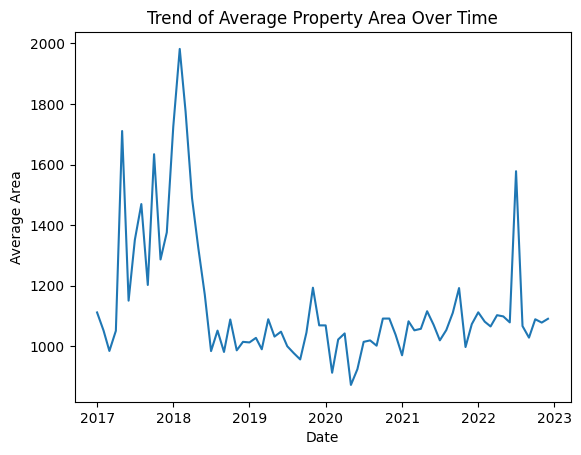

In [44]:
# Sort DataFrame by date
df = df.sort_values('date')

# Calculate average price for each date
average_price = df.groupby('date')['area'].mean()

# Plot average price against date
plt.plot(average_price.index, average_price.values)

plt.xlabel('Date')
plt.ylabel('Average Area')
plt.title('Trend of Average Property Area Over Time')
plt.show()

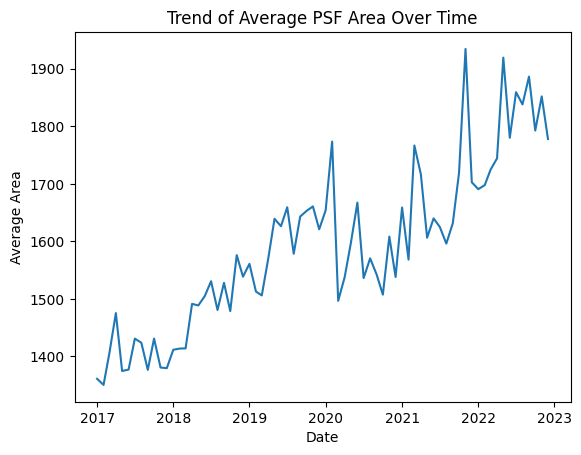

In [45]:
# Sort DataFrame by date
df = df.sort_values('date')

# Calculate average price for each date
average_price = df.groupby('date')['psf'].mean()

# Plot average price against date
plt.plot(average_price.index, average_price.values)

plt.xlabel('Date')
plt.ylabel('Average Area')
plt.title('Trend of Average PSF Area Over Time')
plt.show()